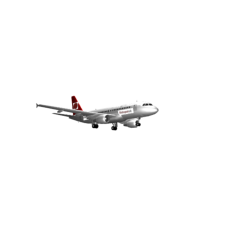

In [12]:
import matplotlib.pyplot as plt
import dataset

path = "dataset/test/test_data/873f4d2e92681d12709eb7790ef48e0c/models/model_normalized.obj"
mat = dataset.geometry.random_camera()
color = dataset.rendering.render(path, mat)
plt.figure()
plt.axis('off')
plt.imshow(color)
plt.show()

In [13]:
import dataset

In [14]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl"
import numpy as np
import trimesh
import pyrender

In [20]:
planes_path = "data/planes"
tf_dataset = dataset.dataset.read_dataset(planes_path)
for x,y in tf_dataset.take(1):
    pass

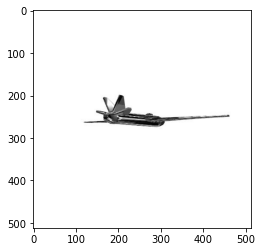

In [21]:
plt.imshow(x[0])

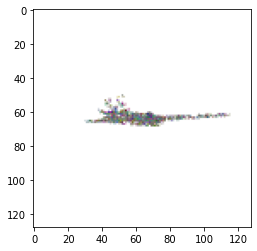

In [23]:
pts = y[0].numpy()[:1000]
colors = np.random.uniform(size=pts.shape)
m = pyrender.Mesh.from_points(pts, colors=colors)
scene = pyrender.Scene()
scene.add_node(pyrender.Node(mesh=m))
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
s = np.sqrt(2)/2
mat_default = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,1],
    [0,0,0,1],
])
scene.add(camera, pose=mat_default)

light = pyrender.SpotLight(color=np.ones(3), intensity=4.0,
                           innerConeAngle=np.pi/16.0)
scene.add(light, pose=mat_default)
light = pyrender.SpotLight(color=np.ones(3), intensity=6.0,
                           innerConeAngle=0.2*np.pi)
light_pose = np.array([
    [0,1,0,0],
    [0,0,1,1],
    [1,0,0,0],
    [0,0,0,1]
], dtype=np.float32)
scene.add(light, pose=light_pose)
r = pyrender.OffscreenRenderer(128, 128)
try :
    color2, depth = r.render(scene)
    plt.imshow(color2)
except Exception as e:
    print(type(e))